# Objectifs

l'objectif de cette feuille est de pouvoir lire des fichiers txt contenant des labyrinthes, afin de pouvoir déléguer le travail de processing à c++, et de seulement faire la représentation statistique avec python et sagemath, cela se fera en plusieurs tons :

* affichage d'un labyrinthe
* lecture d'un fichier
* création éventuelle d'une fonction de hachage sur python pour les labyrinthes, afin de pouvoir les distinguer et faire des études statistiques
* lecture et écriture en boucle, avec python, bash et c++

# import des fonctions utiles pour se représenter un labyrinthe

In [87]:
from ast import literal_eval # https://stackoverflow.com/questions/25023018/convert-a-string-tuple-to-a-tuple#comment38914179_25023018

In [95]:
import random
class Cell:
    def __init__(self,x,y):
        self.x, self.y = x, y
        self.walls = {'top':True, 'left':True, 'bottom':True, 'right':True}
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __hash__(self):
        """ surcharge de la fonction de hachage des cellules, pour pouvoir les utiliser dans des tables de hachage (dictionnaire) """
        return hash((self.x, self.y))
    
class GraphLabyrinth:
    def __init__(self, m, n):
        self.m = m
        self.n = n
        self.cells = []
        for i in range(m):
            for j in range(n):
                self.cells.append(Cell(i, j))
    def affiche(self):
        listemurs = []
        for cellule in self.cells:
            if cellule.walls['top']:
                    listemurs.append(line2d([(cellule.x, cellule.y+1), (cellule.x+1, cellule.y+1)], color='green', thickness=2))
            if cellule.walls['bottom']:
                listemurs.append(line2d([(cellule.x, cellule.y), (cellule.x+1, cellule.y)], color='green', thickness=2))
            if cellule.walls['left']:
                listemurs.append(line2d([(cellule.x, cellule.y), (cellule.x, cellule.y+1)], color='green', thickness=2))
            if cellule.walls['right']:
                listemurs.append(line2d([(cellule.x+1, cellule.y), (cellule.x+1, cellule.y+1)], color='green', thickness=2))
        return sum(listemurs)
    def debug(self):
        for cellule in self.cells:
            print(f"({cellule.x}, {cellule.y}) : top : {cellule.walls['top']}, bottom : {cellule.walls['bottom']}, right : {cellule.walls['right']}, left : {cellule.walls['left']}")
    def read(self, filename):
        file = open(filename, 'r')
        content = file.readlines()
        coords = []
        wallvalues = []
        for i in range(len(content)):
            content[i] = content[i].strip('\n').split(":")
            coords.append(content[i][0])
            wallvalues.append(content[i][1])
        file.close()
        #print(coords)
        #print(wallvalues)
        # Ici, les wallvalues commencent
        for i in range(len(coords)):
            coord = literal_eval(coords[i])
            wallvalues[i] = wallvalues[i].strip()
            #print(wallvalues[i][0])
            self.cells[coord[0]*self.m + coord[1]].walls["top"] = bool(int(wallvalues[i][0])) 
            self.cells[coord[0]*self.m + coord[1]].walls["bottom"] = bool(int(wallvalues[i][1])) 
            self.cells[coord[0]*self.m + coord[1]].walls["right"] = bool(int(wallvalues[i][2])) 
            self.cells[coord[0]*self.m + coord[1]].walls["left"] = bool(int(wallvalues[i][3]))
        print("yes")

In [109]:
laby = GraphLabyrinth(4, 6)
laby.read("laby.txt")

yes


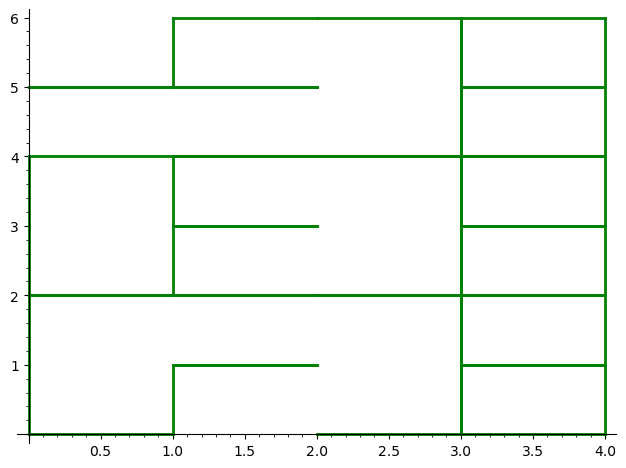

In [110]:
laby.affiche()